In [1]:
import matplotlib.pyplot as plt

from timeseries_ml_utils.data import *
from timeseries_ml_utils.encoders import *

# fetch data
data = DataFetcher(["GLD.US"], limit=350)
data.fetch_data().tail()

print(len(data.get_dataframe()))
model_data = DataGenerator(data.get_dataframe(),  
                           {"Close$": identity}, 
                           {"Close$": identity},
                           aggregation_window_size=16, batch_size=10, model_filename="/tmp/keras-foo-12.h5")



Using TensorFlow backend.


350


In [2]:
ref_value_decoders = [(col, lambda x, ref, _: np.repeat(ref, len(x))) for col, _ in model_data.labels]
x = model_data.back_test(lambda x: x[:, -1], ref_value_decoders)

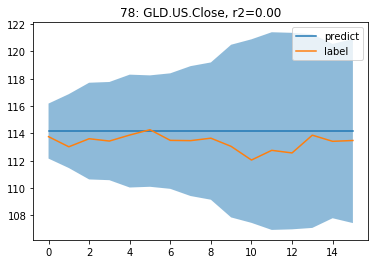

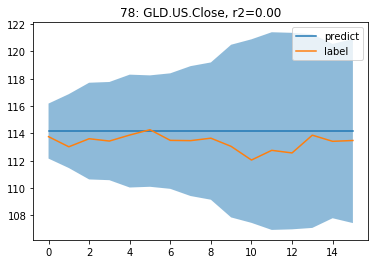

In [8]:
x.plot_random_sample()